In [141]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [142]:
iris=pd.read_csv("F:/PGA10_PYTHON PROG/iris.csv")

In [143]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [144]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [145]:
iris1=iris.drop(['species'],axis=1)


X=iris1
iris2=iris1
X1=iris2

kmeans= KMeans(n_clusters=3, random_state=0).fit(X)



labels=kmeans.labels_
labels



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [146]:

iris1["labels"]=labels
iris1.head()

Y=iris1['labels']




<Figure size 432x288 with 0 Axes>

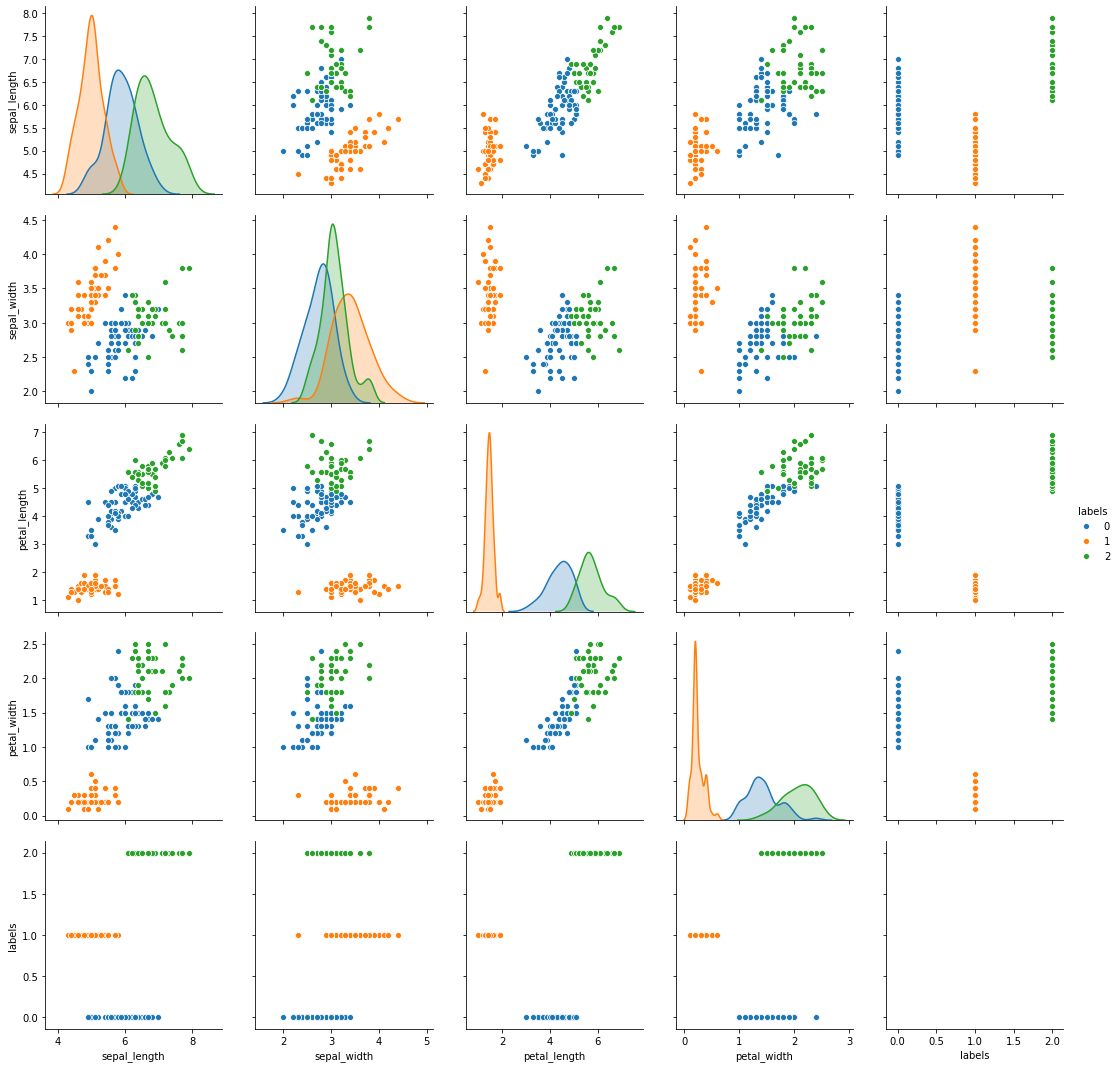

In [147]:
import warnings
warnings.filterwarnings("ignore")
plt.figure()
dataset=iris1[["sepal_length","sepal_width","petal_length","petal_width","labels"]]
sns.pairplot(dataset,hue="labels",size=len(set(labels)))
plt.show()

In [148]:
# iris1["sepal_area"]=iris1["sepal_length"]*iris1["sepal_width"]
# iris1["petal_area"]=iris1["petal_length"]*iris1["petal_width"]
# iris1.head(1)

pca=PCA(n_components=2)
pca.fit(X)
features=pca.transform(X); #you can fit for new data
print(features.shape,labels.shape)



(150, 2) (150,)


In [149]:

labels_t= labels.reshape(1,-1).T
print(features.shape, labels_t.shape)
output=np.concatenate((features,labels_t),axis=1)
print(output.shape)

(150, 2) (150, 1)
(150, 3)


In [150]:
unique_labels=set(iris1.labels); print(unique_labels)


{0, 1, 2}


In [151]:
output[0]
output[output[:,2]==0]
output[output[:,2]==0][0]
output[output[:,2]==0].transpose()[0]

array([ 1.20682418,  0.85449708,  0.10095762,  1.00734994,  0.56044478,
        1.01659705, -0.82836377,  0.96427349, -0.0886829 , -0.59028335,
        0.43313613,  0.1828881 ,  0.90390014, -0.25071286,  0.85016683,
        0.58000557,  0.15638072,  0.86034048, -0.03518495,  1.03608783,
        0.27939131,  1.21400612,  0.84022972,  0.63604866,  0.8217343 ,
        1.2508638 ,  0.73292844, -0.38341714, -0.14884503, -0.26982707,
        0.05743459,  1.29572538,  0.50746342,  0.72949015,  1.14160399,
        0.73203647,  0.16758637,  0.08528051,  0.38259769,  0.81083403,
        0.1505007 , -0.78425413,  0.27632959,  0.25333051,  0.29692356,
        0.5635065 , -0.98358835,  0.21953456,  1.33044669,  0.43680978,
        1.26037966,  1.50138058,  1.21393611,  1.11536536,  1.30559248,
        1.17625529,  1.20953466,  1.36094557,  1.08803602,  1.33044669,
        1.44225164,  1.30744761])

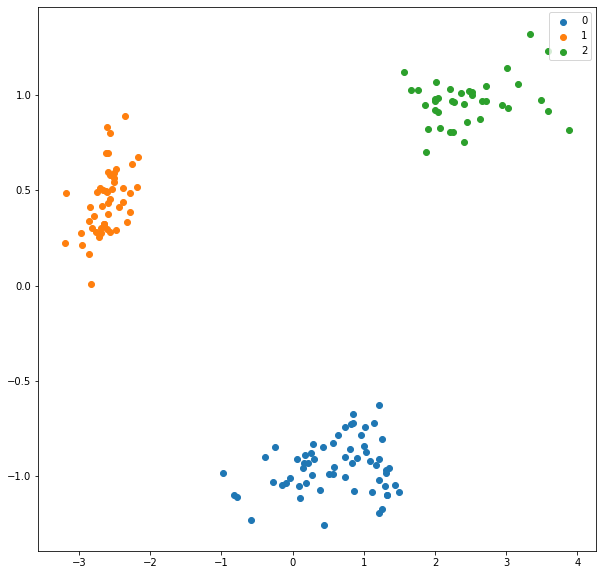

In [152]:
from pylab import rcParams
rcParams['figure.figsize']=10,10

legend=[]
for l in unique_labels:
    sample=output[output[:,2]==l].transpose()
    plt.scatter(sample[0],sample[1])
    legend.append(l)
plt.legend(legend)
plt.show()
    

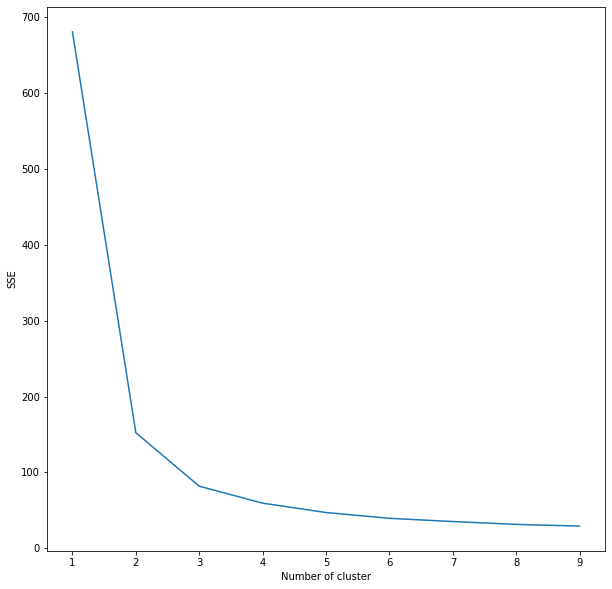

In [153]:
#find the optimum number of clusters
sse = {}
data=iris.drop(['species'],axis=1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [154]:
for l in unique_labels:
    sample=output[output[:, 2]==l]
    print(l, ":",len(sample))

0 : 62
1 : 50
2 : 38


In [155]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(kmeans,random_state=123)

In [156]:

for l in unique_labels:
    kfold=KFold(n_splits=3, shuffle=False, random_state=l)

    output1= cross_val_score(kmeans,X,Y,cv=kfold)
    output2=abs(output1)
    print(l, ":",output2)


0 : [322.2225      66.90874277  62.94181818]
1 : [322.2225      60.6337415   63.77185185]
2 : [322.2225      67.00698917  63.0582562 ]


In [157]:
kf = KFold(n_splits=4)
X
kf.get_n_splits(X)
X1=np.array(X)
Y1=np.array(Y)


print(kf)

KFold(n_splits=4, random_state=None, shuffle=False)


In [158]:
X1.shape
Y1.shape


(150,)

In [159]:
# for index in kf.split(X):
    
#     X1_index=X1[index].reshape
#     Y1_index=Y1[index]

X2=X.iloc[0:50:,]
X3=X.iloc[51:100:,]
X4=X.iloc[101:149:,]

Y2=Y.iloc[0:50:,]
Y3=Y.iloc[51:100:,]
Y4=Y.iloc[101:149:,]

    
# print(X2)
#print(X3)
# print(Y1)

In [160]:
 for l in unique_labels:
        
        
        output1= cross_val_score(kmeans,X2,Y2)
         
        output2=abs(output1)
        print(l, ":",output2)

0 : [1.58490833 1.80291293 1.38614167]
1 : [1.51948741 1.98475459 1.52817398]
2 : [1.47384966 1.92674167 1.62412222]
